<a href="https://colab.research.google.com/github/lephuocdat2000/-CS114.K21-/blob/master/Round3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
!wget https://cs.uit.edu.vn/data3.txt
!ls

--2020-06-19 07:22:03--  https://cs.uit.edu.vn/data3.txt
Resolving cs.uit.edu.vn (cs.uit.edu.vn)... 118.69.123.142
Connecting to cs.uit.edu.vn (cs.uit.edu.vn)|118.69.123.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178891 (175K) [text/plain]
Saving to: ‘data3.txt.1’

data3.txt.1         100%[===================>] 174.70K   379KB/s    in 0.5s    

2020-06-19 07:22:05 (379 KB/s) - ‘data3.txt.1’ saved [178891/178891]

data3.txt  data3.txt.1	sample_data


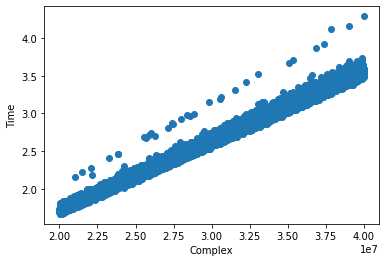

In [25]:
data=pd.read_csv('data3.txt',header=None)
data.columns=['Complexity','Timing']
x=data[['Complexity']]
y=data[['Timing']]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,)
plt.scatter(X_train,y_train)
plt.ylabel("Time")
plt.xlabel("Complex")
plt.show()

In [18]:
model=LinearRegression().fit(X_train,y_train)
print("Slope: ",model.coef_)
print("Intercept: ",model.intercept_)
y_fit=model.predict(X_train)
y_predict=model.predict(X_test)

Slope:  [[9.27290489e-08]]
Intercept:  [-0.13820456]


In [19]:
def Prediction(x,train=X_train,model=model):
  # squarex=np.power(x,2)
  #log2x=np.log2(x,where=(x!=0))*x
   arr=np.array([[x]])
   pred=model.predict(arr)
   print("Thoi gian du tinh cua thuat toan voi do phuc tap ",x," la: ",pred[0][0])
Prediction(39546552)

Thoi gian du tinh cua thuat toan voi do phuc tap  39546552  la:  3.5289095908557067


Đánh giá model

Hệ số R square:

In [15]:
r2_score(y_test,y_predict)

0.9897290008911028

Mean Square error

In [27]:
import math
test_mse = mean_squared_error(y_test, y_predict,)
print(math.sqrt(test_mse))
mean_test=np.mean(y_test)
print(mean_test)

0.05452733740766903
Timing    2.641946
dtype: float64


Kết quả tệ hơn so với Round 2 ( R square thấp hơn (Round 2 là 0.99...)  và mean square error cao hơn nhiều (Round2 là 0.00014...)) 

Vấn đề ở đây là ở tập training set mới có khá nhiều data point nằm cách xa bộ dữ liệu tập trung gây sai lệch cho model trong việc tính toán slope và intercept sao cho cost function là thấp nhất 

Xây dựng model mới với việc thêm 2 features là nlog2n và nsquare

In [35]:
new_data=data.assign(Square=np.power(data['Complexity'],2),Logarit=np.log2(data['Complexity'],where=(data['Complexity']!=0))*data['Complexity'])
add_data=data.assign(Square=np.power(new_data['Complexity'],2),Logarit=(np.log2(new_data['Complexity'],where=(new_data['Complexity']!=0)))*new_data['Complexity'])
new_x=add_data[['Complexity','Square','Logarit']]
new_X_train,new_X_test,new_y_train,new_y_test=train_test_split(new_x,y,test_size=0.2,random_state=1,)
new_model=LinearRegression(normalize=True).fit(new_X_train,new_y_train)
print("Slope: ",new_model.coef_)
print("Intercept: ",new_model.intercept_)
new_y_fit=new_model.predict(new_X_train)
new_y_predict=new_model.predict(new_X_test)

Slope:  [[ 6.34826082e-07  6.52316668e-16 -2.21298109e-08]]
Intercept:  [-0.50187066]


In [36]:
new_score= r2_score(new_y_test,new_y_predict)
new_score - r2_score(y_test,y_predict)

8.081489654143681e-07

In [37]:
new_test_mse = mean_squared_error(new_y_test,new_y_predict)
new_test_mse - test_mse

-2.3394152285196104e-07

Với việc thêm 2 cột nlog2n và n^2 thì r square có cao hơn nhưng rất ít và mean square error còn thấp hơn ban đầu mặc dù chênh lệch cũng rất ít => mô hình này hiệu suất tương đương mô hình cũ 

In [ ]:
def New_Prediction(x,train=new_X_train,model=new_model):
   squarex=np.power(x,2)
   xlog2x=(np.log2(x,where=(x!=0)))*x
   arr=np.array([[x,squarex,xlog2x]])
   pred=model.predict(arr)
   print("Thoi gian du tinh cua thuat toan voi do phuc tap ",x," la: ",pred[0][0])

In [ ]:
New_Prediction(21258818   )
Prediction(21258818   )

In [ ]:
new_X_test,new_y_test
